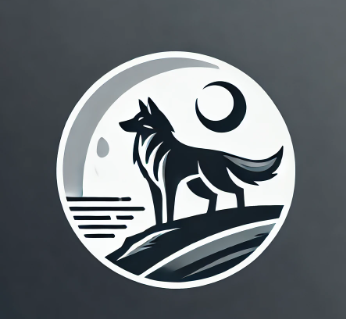

**ESTUDIO EMPRESA LOBO SOLITARIO**

Somos una empresa dedicada al estudio de mercados, se ha puesto en contacto con nosotros el responsable de **miHoYo**.

Nos han pedido realizar un análisis de los distintos personajes para sacar un estudio que le ayude al proximo desarrollo de los mismo:
-	Identificar número de personajes masculinos y femeninos.
- Identificar cual es el tipo de arma que menos hay.
-	Cual es elemento más repetido .
-	Identificar los cumpleaños de los personajes.
- Calcular la media de los atributos de hp,atk,def.

## Estudio de la BBDD

In [2]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("genshin.csv",encoding="latin1")

df.head(5)

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,...,1030,20,68,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,...,1039,24,60,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
2,Aloy,5,NaN,Cryo,NaN,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,...,848,18,53,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
3,Amber,4,Mondstadt,Pyro,NaN,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,...,793,19,50,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
4,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,Tall Male,Taurus Iracundus,1-Jun,Way of the Strong,...,1001,18,75,0.0%,0.0%,4.8%,9.6%,9.6%,14.4%,19.2%


In [3]:
import pandas as pd

# Cargar el archivo CSV, el latin 1 es porque hay carácteres extraños
df = pd.read_csv("genshin.csv",encoding="latin1")

df.columns

Index(['character_name', 'rarity', 'region', 'vision', 'arkhe', 'weapon_type',
       'model', 'constellation', 'birthday', 'special_dish', 'affiliation',
       'release_date', 'limited', 'voice_eng', 'voice_cn', 'voice_jp',
       'voice_kr', 'ascension', 'ascension_specialty', 'ascension_material',
       'ascension_boss', 'talent_material', 'talent_book_1-2',
       'talent_book_2-3', 'talent_book_3-4', 'talent_book_4-5',
       'talent_book_5-6', 'talent_book_6-7', 'talent_book_7-8',
       'talent_book_8-9', 'talent_book_9-10', 'talent_weekly', 'hp_90_90',
       'atk_90_90', 'def_90_90', 'hp_80_90', 'atk_80_90', 'def_80_90',
       'hp_80_80', 'atk_80_80', 'def_80_80', 'hp_70_80', 'atk_70_80',
       'def_70_80', 'hp_70_70', 'atk_70_70', 'def_70_70', 'hp_60_70',
       'atk_60_70', 'def_60_70', 'hp_60_60', 'atk_60_60', 'def_60_60',
       'hp_50_60', 'atk_50_60', 'def_50_60', 'hp_50_50', 'atk_50_50',
       'def_50_50', 'hp_40_50', 'atk_40_50', 'def_40_50', 'hp_40_40',
       'a

Cabeceras significativas:

**character_name** (nombre del personaje): *string*

Representa el nombre de un personaje.

**rarity** (rareza): *int*

Indica la rareza del personaje(como 4 o 5 estrellas).

**region** (región): *string*

Representa el lugar o región de origen del personaje.

**vision** (visión elemental): *string*

El tipo de elemento (como Pyro, Hydro, etc.) el cual pertenece al personaje

**arkhe**: *string*

Se refiere a un tipo o categoría especial relacionada con la energía o afinidad.

**weapon_type** (tipo de arma): *string*

El tipo de arma que utiliza el personaje (por ejemplo, espada, arco).

**model** (modelo): *string*

Da un pequeña descripción del modelo gráfico del personaje(Si es un hombre alto, mujer media,etc).

**constellation** (constelación): *string*

Nombre de la constelación del personaje.

**birthday** (cumpleaños): *datetime*

Fecha de nacimiento del personaje.

**special_dish** (plato especial): *string*

El nombre de un platillo que el personaje puede cocinar.

**affiliation** (afiliación): *string*

La afiliación o grupo al que pertenece el personaje

**release_date** (fecha de lanzamiento): *datetime*

La fecha en que se lanzó el personaje.

**limited** (limitado): *boolean*

Indica si el personaje es de tiempo limitado o no.

**ascension** (ascensión): *categorical*

Este campo se refiere a las etapas de ascensión de un personaje, que estan categorizadas en niveles.

**ascension_specialty** (especialidad de ascensión): *string*

Este campo indica un objeto o material especial que es único para ese personaje durante su ascensión.

**ascension_material** (materiales de ascensión): *string*

Aquí se listan los materiales comunes requeridos para la ascensión.

**ascension_boss** (material de jefe de ascensión): *string*

Se refiere al material específico que se obtiene al derrotar a ciertos jefes en el juego, requerido para la ascensión.

**talent_material**(material de talentos): *string*

Se refiere a los materiales que se utilizan para mejorar los talentos del personaje.

También existen varias columnas con las estadísticas de los personajes como su vida(HP), ataque(ATK), defensa(DEF) en cada uno de los niveles de ascensión.Solo tendremos en cuenta la última para cálculo de los parametros.

## Limpieza de la BBDD

Vamos a empezar la limpieza de la BBDD.
Primero buscaremos los valores nulos.

In [4]:
import pandas as pd

# Cargar el archivo CSV
df_vacio = pd.read_csv("/content/genshin.csv",encoding="latin1")

# Mostrar solo las columnas que tienen valores nulos
Vacio = df_vacio.isnull().sum()[df_vacio.isnull().sum() > 0]

Vacio

,0
region,11
arkhe,75
special_dish,11
affiliation,11
limited,11
ascension_boss,10


Detectamos que varias columnas tienen nulos:

**region**	11

**arkhe**	75

**special_dish**	11

**affiliation**	11

**limited**	11

**ascension_boss**	10


Empezamos con la limpieza de datos eliminando los campos vacios.

In [6]:
# Cargar el archivo CSV
df_limpio = pd.read_csv("/content/genshin.csv",encoding="latin1")

#Rellenar valores nulos en varias columnas sin utilizar inplace
df_limpio["region"] = df_limpio["region"].fillna("Sin región", inplace=True)
df_limpio["arkhe"] = df_limpio["arkhe"].fillna("Sin afinidad", inplace=True)
df_limpio["special_dish"] = df_limpio["special_dish"].fillna("No tine plato", inplace=True)
df_limpio["affiliation"] = df_limpio["affiliation"].fillna("Independiente", inplace=True)
df_limpio["limited"] = df_limpio["region"].fillna("FALSE", inplace=True)
df_limpio["ascension_boss"] = df_limpio["ascension_boss"].fillna("Sin material", inplace=True)

df_limpio.to_csv("genshin_cleaned.csv", index=False)

<ipython-input-6-f26283bb6237>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio["region"] = df_limpio["region"].fillna("Sin región", inplace=True)
<ipython-input-6-f26283bb6237>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Vamos a eliminar los duplicados.

In [7]:
# Funcion para limpiar Duplicados
df_limpio = df_limpio.drop_duplicates()

df_limpio.to_csv("genshin_cleaned_final.csv", index=False)

## Identificar número de personajes masculinos y femeninos.


Dado que queremos identificar el número de personajes femeninos y masculinos tenemos que normalizar la columna model, porque hay un string compuesto.

In [8]:
#Función para eliminar los términos "Tall", "Medium" o "Short"
def tamaño(value):
    if isinstance(value, str):  # Verifica si el valor es una cadena
        return value.replace("Tall", "").replace("Medium", "").replace("Short", "").strip()#strip elimina el espacio en blanco
    return value

df_limpio["genero"] = df_limpio["model"].apply(tamaño)

df_limpio.to_csv("genshin_cleaned_final.csv", index=False)

In [9]:
# Leer el archivo CSV
df_genero = pd.read_csv("genshin_cleaned_final.csv",encoding="latin1")

# Crear un nuevo DataFrame agrupando por "genero" y contando el número PJ masculinos y femeninos.
grupo_genero = df_genero.groupby("genero").size().reset_index(name="Número")

grupo_genero.to_csv("genero.csv", index=False)

Vemos que existen muchos más personajes femeninos:

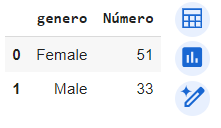

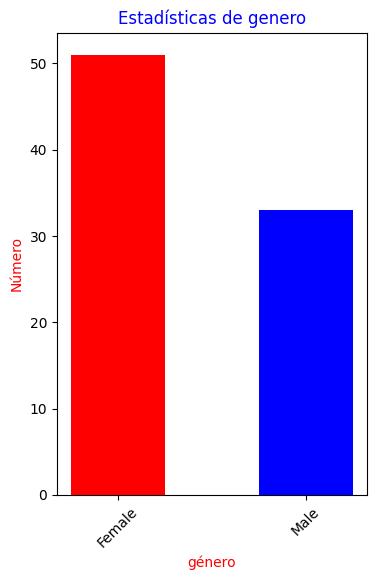

In [11]:
#GRAFICO DE GÉNEROS
import matplotlib.pyplot as plt

df_genero = pd.read_csv("genero.csv", low_memory=False)
genero = df["genero"]
numero = df["Número"]
colores = ["red", "blue"]

plt.figure(figsize=(4, 6))

# Crear el gráfico de barras
plt.bar(genero, numero, color= colores,width=0.5)

# Añadir título y etiquetas
plt.title("Estadísticas de genero", color="blue")
plt.xlabel("género",color="red")
plt.ylabel("Número",color="red")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## Identificar cual es el tipo de arma que menos hay.

In [12]:
# Leer el archivo CSV
df_armas = pd.read_csv("genshin_cleaned_final.csv",encoding="latin1")

# Crear un nuevo DataFrame agrupando por "genero" y contando el número PJ masculinos y femeninos.
armas= df_armas.groupby("weapon_type").size().reset_index(name="numero_armas")

armas.to_csv("armas.csv", index=False)

Nos arroja estos datos:

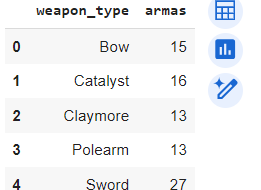

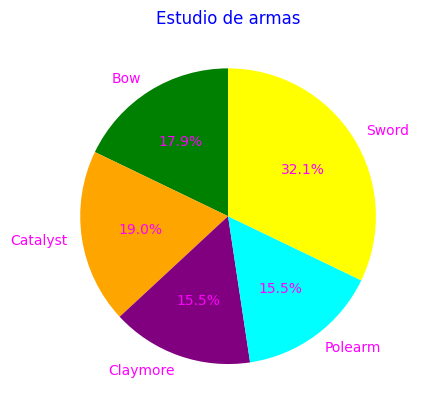

In [14]:
df_armas = pd.read_csv("armas.csv", low_memory=False)
tipo = df["weapon_type"]
arma = df["numero_armas"]
colores = ["green", "orange", "purple", "cyan","yellow", "brown"]

# Crear el gráfico de tarta
plt.pie(arma, labels=tipo, colors=colores, autopct="%1.1f%%", startangle=90,textprops={"color": "#FF00FF"})

# Añadir título
plt.title("Estudio de armas", color="blue")

# Mostrar el gráfico
plt.show()

## Cual es elemento más repetido .

Vamos a efocarnos ahora la característica elemental que tienen los personajes

In [16]:
# Leer el archivo CSV
df_elemento = pd.read_csv("genshin_cleaned_final.csv",encoding="latin1")

# Crear un nuevo DataFrame agrupando por "elemento" y contando el número PJ que tienen dicho elemento.
elemento= df_elemento.groupby("vision").size().reset_index(name="elemento")

elemento.to_csv("elemento.csv", index=False)

Comprobamos que el elemento más común es el hielo(Cryo)

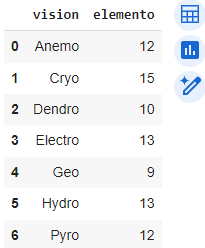

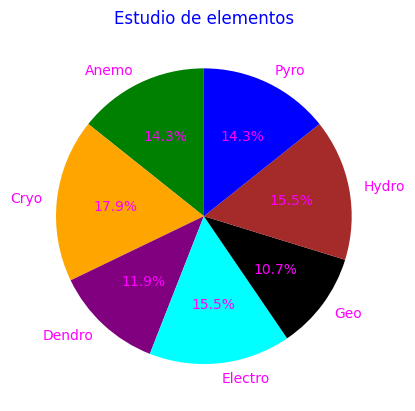

In [18]:
df_elemento = pd.read_csv("elemento.csv", low_memory=False)
vision = df_elemento["vision"]
elemento = df_elemento["elemento"]
colores = ["green", "orange", "purple", "cyan","black", "brown","blue"]

# Crear el gráfico de tarta
plt.pie(elemento, labels=vision, colors=colores, autopct="%1.1f%%", startangle=90,textprops={"color": "#FF00FF"})

# Añadir título
plt.title("Estudio de elementos", color="blue")

# Mostrar el gráfico
plt.show()

## Identificar los cumpleaños de los personajes.

In [21]:
# Cargar el archivo CSV
df_Cumpleaños = pd.read_csv("genshin_cleaned_final.csv",encoding="latin1")

#Función para separar el dia del mes y almacenarlo en 2 columnas
def separar_dia_mes(value):
    if isinstance(value, str):  # Verifica si el valor es una cadena
        partes = value.split("-")
        if len(partes) == 2: #Verifica que se ha dividido la fecha correctamente
            return partes[0], partes[1]  # Devuelve día y mes
    return None, None

# Aplicar la función y crear las nuevas columnas
df_Cumpleaños["día"], df_Cumpleaños["mes"] = zip(*df_Cumpleaños["birthday"].apply(separar_dia_mes))

cumple= df_Cumpleaños[['mes', 'día']]

cumple.to_csv("cumple.csv", index=False)

Vamos a hacer un estudio del cumpleaños de los PJ para ver donde se producen más coencidencias de días:

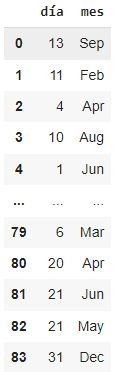

Realizamos un gráfico de dispersión para tener una idea general de las fechas

In [ ]:
import numpy as np

df_Cumpleaños = pd.read_csv("cumple.csv", low_memory=False)

# Generar datos para el gráfico
x = df_Cumpleaños["mes"]
y = df_Cumpleaños["día"]
colores = np.arange(len(x))  # Generar una secuencia de enteros para el colormap
tamaño = 100

# Crear el gráfico de dispersión
plt.scatter(x, y, c=colores, s=tamaño, marker="*",cmap="autumn", alpha=0.5)
plt.colorbar()

# Título y etiquetas
plt.title("Cumpleaños")
plt.xlabel("Mes")
plt.ylabel("Día")

# Mostrar el gráfico
plt.show()

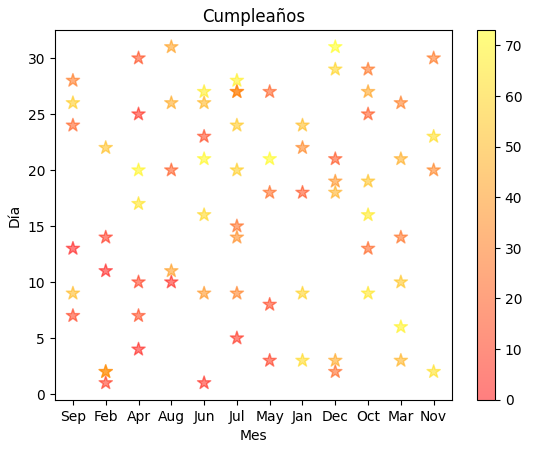

## Calcular la media de los atributos de hp,atk,def

La empresa nos solicita que calculemos la media de las estadísticas de los personajes para que el nuevo PJ este acorde al estandar del juego

In [37]:
media_vida= int(df_limpio["hp_90_90"].mean())
print(f"la media de vida es ",media_vida)

media_ataque= int(df_limpio["atk_90_90"].mean())
print(f"la media de ataque es ",media_ataque)

media_defensa= int(df_limpio["def_90_90"].mean())
print(f"la media de defensa es ",media_defensa)

# Crear un DataFrame con los resultados
estadisticas = pd.DataFrame({
  "Estadística": ["Vida", "Ataque", "Defensa"],
  "Media": [media_vida, media_ataque, media_defensa]
})

estadisticas.to_csv("estadisticas.csv", index=False)

la media de vida es  11726
la media de ataque es  244
la media de defensa es  698


,Estadística,Media
0,Vida,11726
1,Ataque,244
2,Defensa,698


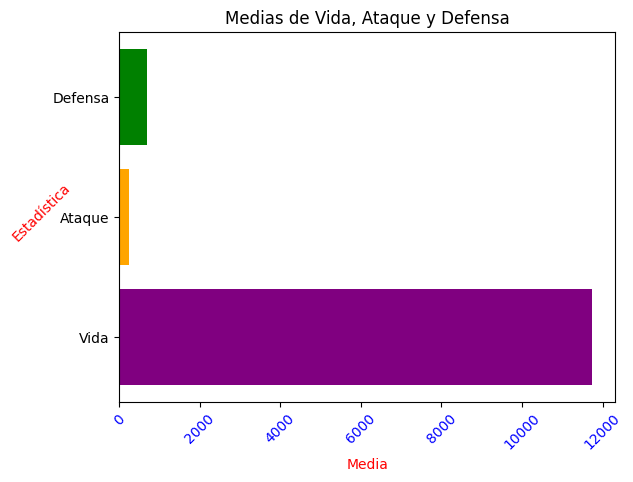

In [38]:
df_estadistica = pd.read_csv("estadisticas.csv", low_memory=False)

plt.barh(estadisticas["Estadística"], estadisticas["Media"], color=['purple', 'orange', 'green'])

plt.title("Medias de Vida, Ataque y Defensa")
plt.xlabel("Media",color="red")
plt.ylabel("Estadística",rotation=45,color="red")
plt.xticks(rotation=45,color="blue")

# Mostrar el gráfico
plt.show()

Vamos a comparar la media con la vida de los PJ, con esto obtendremos una idea de los parámetros y regular la creación de los nuevos integrantes para que no ocasione un desbalanceo

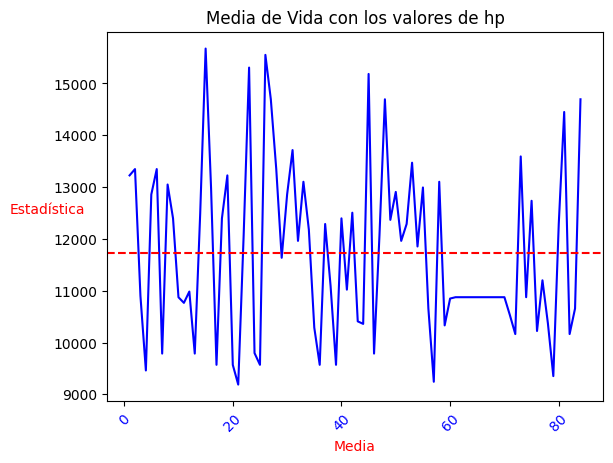

In [45]:
hp_x = np.linspace(1, len(df_limpio["hp_90_90"]), len(df_limpio["hp_90_90"]))
hp_y = df_limpio["hp_90_90"]

plt.plot(hp_x, hp_y, color='blue')

# Agregar la media de hp en y=11726
plt.axhline(y=11726, color="red", linestyle='--', label="Media de HP")

plt.title("Media de Vida con los valores de hp")
plt.xlabel("Media",color="red")
plt.ylabel("Estadística",rotation=00,color="red")
plt.xticks(rotation=45,color="blue")

# Mostrar el gráfico
plt.show()